In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [3]:
#importa datos del aranet4
aranet = pd.read_csv("../data/aranet4.csv",index_col=0,parse_dates=True,
                    names=["aranet","To","HR","P"],skiprows=1)
aranet

aranet    To  HR    P
2021-06-07 00:42:25     381  27.2  57  871
2021-06-07 00:43:25     381  27.2  57  871
2021-06-07 00:44:25     381  27.2  57  871
2021-06-07 00:45:25     381  27.2  57  871
2021-06-07 00:46:25     416  27.3  57  871
...                     ...   ...  ..  ...
2021-06-10 14:46:25     341  27.1  51  878
2021-06-10 14:47:25     335  27.1  50  878
2021-06-10 14:48:25     362  27.1  50  877
2021-06-10 14:49:25     365  27.1  50  877
2021-06-10 14:50:25     355  27.1  50  878

[5169 rows x 4 columns]

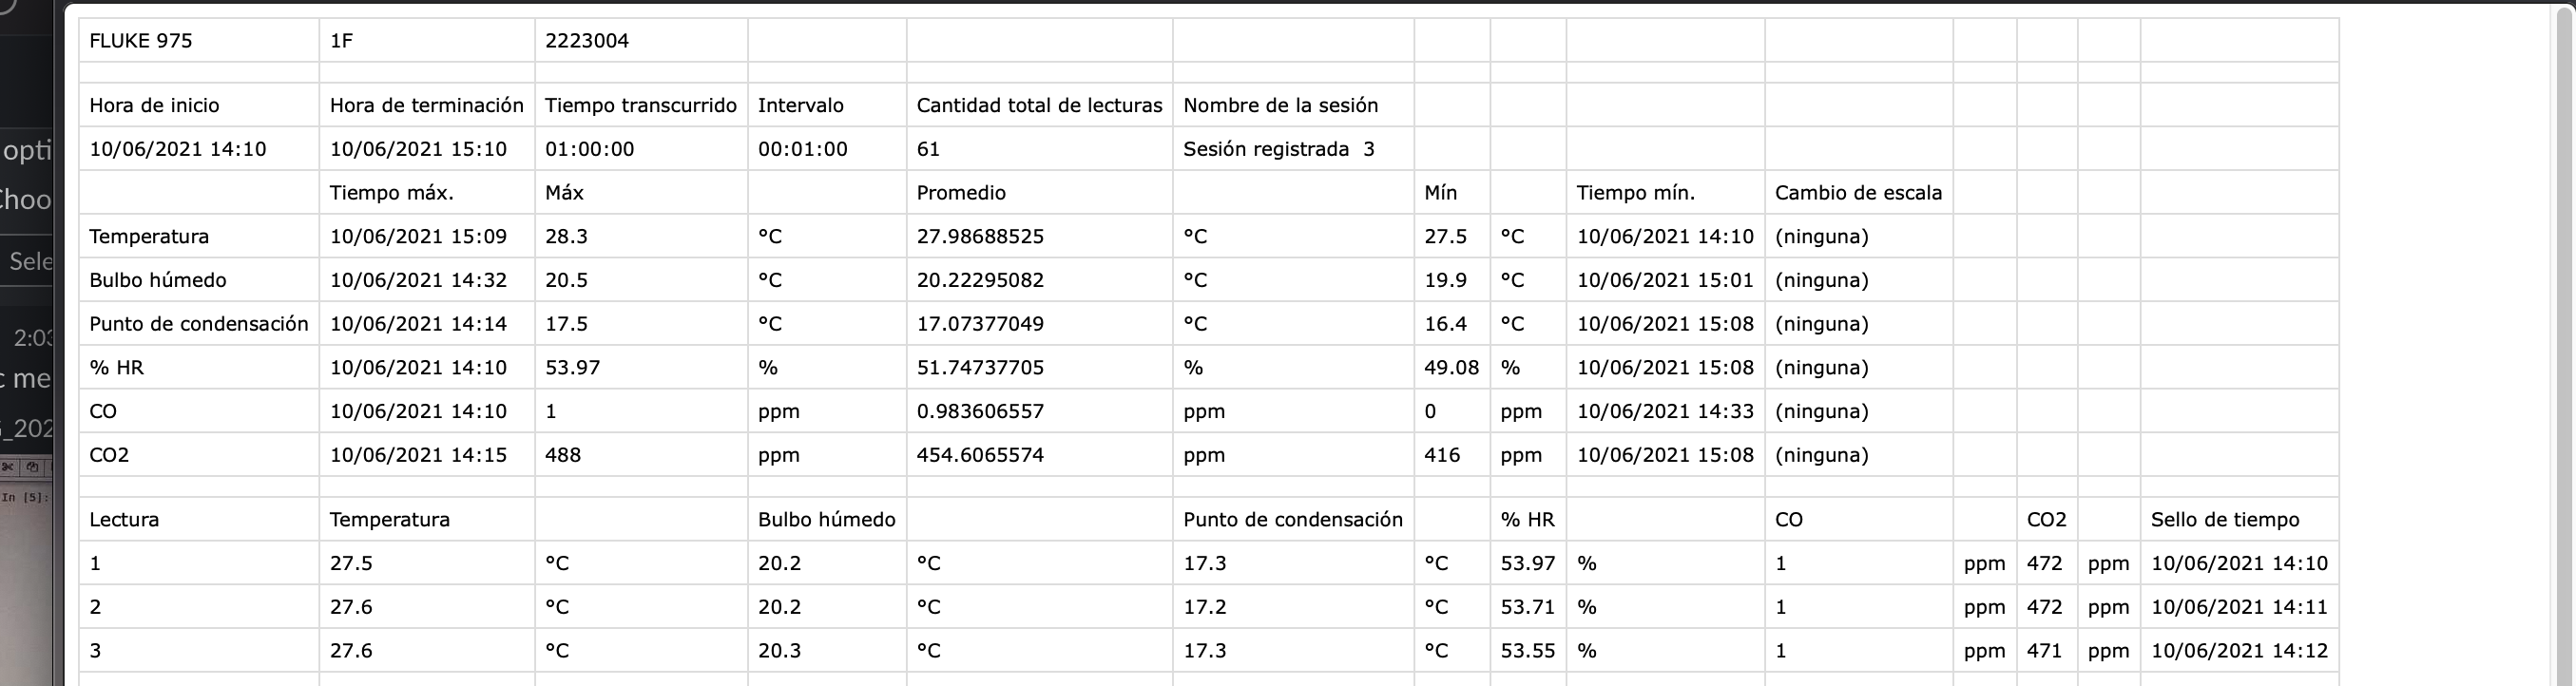

In [4]:
#importa datos del fluke
fluke = pd.read_csv("../data/fluke.csv",encoding="iso-8859-1",
                   skiprows=13,usecols=[11,13],
                   names=["fluke","tiempo"],)
fluke.tiempo = pd.to_datetime(fluke.tiempo,format="%d/%m/%Y %H:%M")
fluke.set_index("tiempo",inplace=True)
fluke

fluke
tiempo                    
2021-06-10 14:10:00    472
2021-06-10 14:11:00    472
2021-06-10 14:12:00    471
2021-06-10 14:13:00    470
2021-06-10 14:14:00    482
...                    ...
2021-06-10 15:06:00    424
2021-06-10 15:07:00    421
2021-06-10 15:08:00    416
2021-06-10 15:09:00    431
2021-06-10 15:10:00    443

[61 rows x 1 columns]

In [5]:
referencia = pd.concat([aranet.aranet,fluke.fluke],axis=1)
referencia

aranet  fluke
2021-06-07 00:42:25   381.0    NaN
2021-06-07 00:43:25   381.0    NaN
2021-06-07 00:44:25   381.0    NaN
2021-06-07 00:45:25   381.0    NaN
2021-06-07 00:46:25   416.0    NaN
...                     ...    ...
2021-06-10 15:06:00     NaN  424.0
2021-06-10 15:07:00     NaN  421.0
2021-06-10 15:08:00     NaN  416.0
2021-06-10 15:09:00     NaN  431.0
2021-06-10 15:10:00     NaN  443.0

[5230 rows x 2 columns]

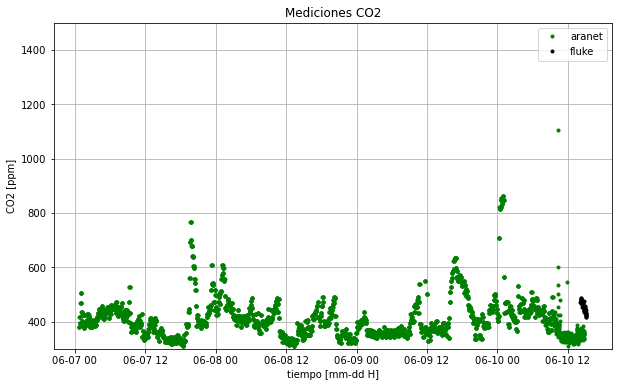

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

# fecha1 = parse("2021-06-21") 
# fecha2 = fecha1 + pd.Timedelta("2D")

# ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,1500)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")

ax.plot(referencia.aranet,"g.",label="aranet")
ax.plot(referencia.fluke, "k.",label="fluke")


ax.legend()
ax.grid()

In [7]:
referencia.to_csv("../data/referencia.csv")